In [1]:
import torch

In [11]:
path = "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log"


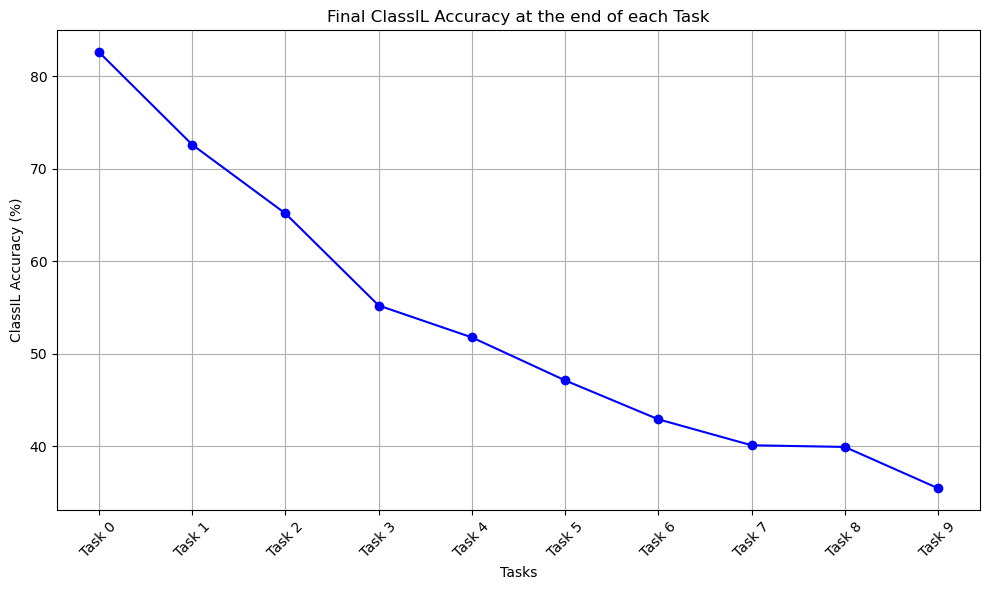

In [12]:
import re
import pandas as pd
import matplotlib.pyplot as plt

classil_accuracies = []
tasks = []

with open(path, 'r') as file:
    for line in file:

        # Taskの終了を示すログ行を正規表現で検出
        match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
        if match:
            task_id, epoch, classil_acc = match.groups()
            task_id, epoch = int(task_id), int(epoch)
            classil_acc = float(classil_acc)
            
            # 新しいtaskが出現したら追加
            if len(tasks) == 0 or tasks[-1] != task_id:
                tasks.append(task_id)
                classil_accuracies.append([])
            
            # 最新のtaskのClassIL_accuracyを記録
            classil_accuracies[-1].append(classil_acc)

# 各taskの最後のepochの精度のみを抽出
final_classil_accuracies = [accs[-1] for accs in classil_accuracies]
task_indices = [f'Task {i}' for i in tasks]

# 可視化
plt.figure(figsize=(10, 6))
plt.plot(task_indices, final_classil_accuracies, marker='o', linestyle='-', color='b')
plt.title('Final ClassIL Accuracy at the end of each Task')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

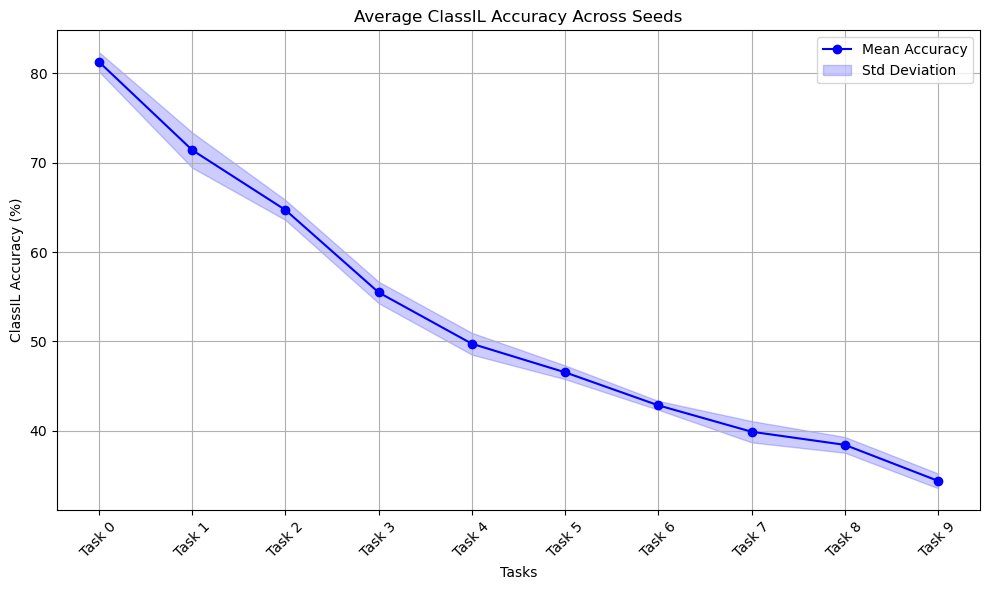

In [13]:
import re

import numpy as np
import matplotlib.pyplot as plt

log_files = [
    "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
    "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
    "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
    "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
    "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
]

# 全シードのタスクごとの精度を格納するリスト
all_seed_task_accuracies = []

for log_file in log_files:
    tasks = []
    classil_accuracies = []

    with open(log_file, 'r') as file:
        for line in file:
            match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
            if match:
                task_id, epoch, classil_acc = match.groups()
                task_id, epoch = int(task_id), int(epoch)
                classil_acc = float(classil_acc)
                
                if len(tasks) == 0 or tasks[-1] != task_id:
                    tasks.append(task_id)
                    classil_accuracies.append([])

                classil_accuracies[-1].append(classil_acc)

    # 各タスク終了時の最終精度だけを抽出
    final_accuracies = [accs[-1] for accs in classil_accuracies]
    all_seed_task_accuracies.append(final_accuracies)

# NumPy配列に変換し、シードごとに平均値と標準偏差を計算
all_seed_task_accuracies = np.array(all_seed_task_accuracies)
mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
std_accuracies = np.std(all_seed_task_accuracies, axis=0)

# 可視化
task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

plt.figure(figsize=(10, 6))
plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', color='blue', label='Mean Accuracy')
plt.fill_between(task_indices,
                 mean_accuracies - std_accuracies,
                 mean_accuracies + std_accuracies,
                 color='blue', alpha=0.2, label='Std Deviation')

plt.title('Average ClassIL Accuracy Across Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


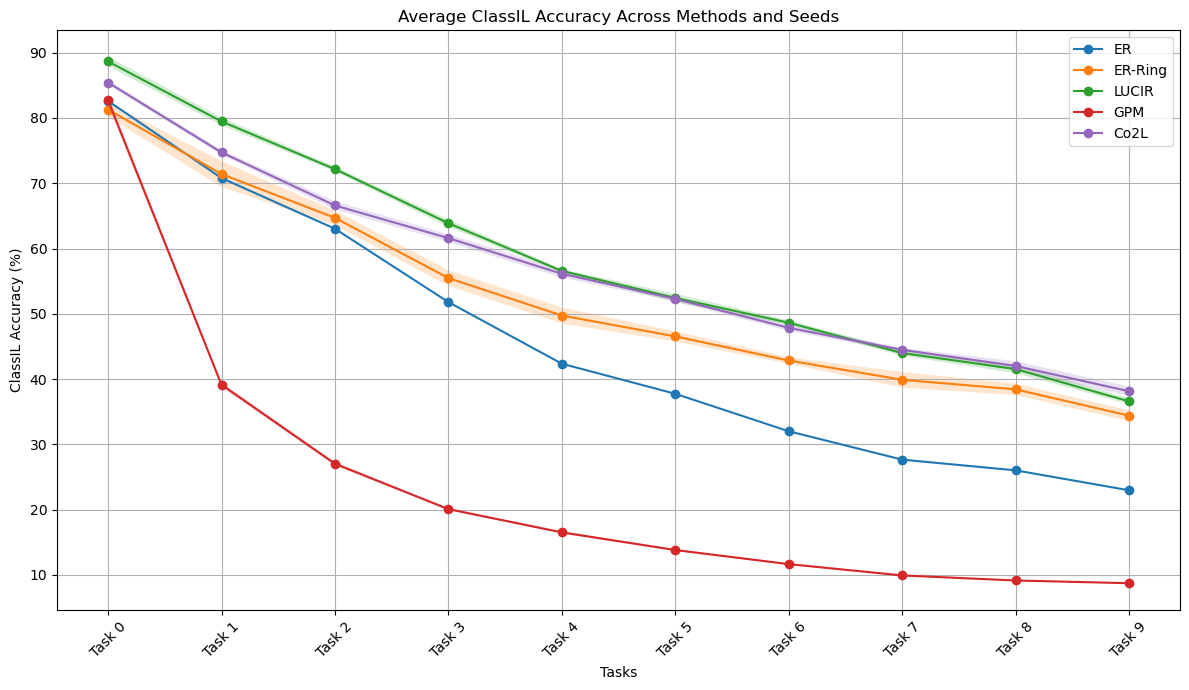

In [38]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ]
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

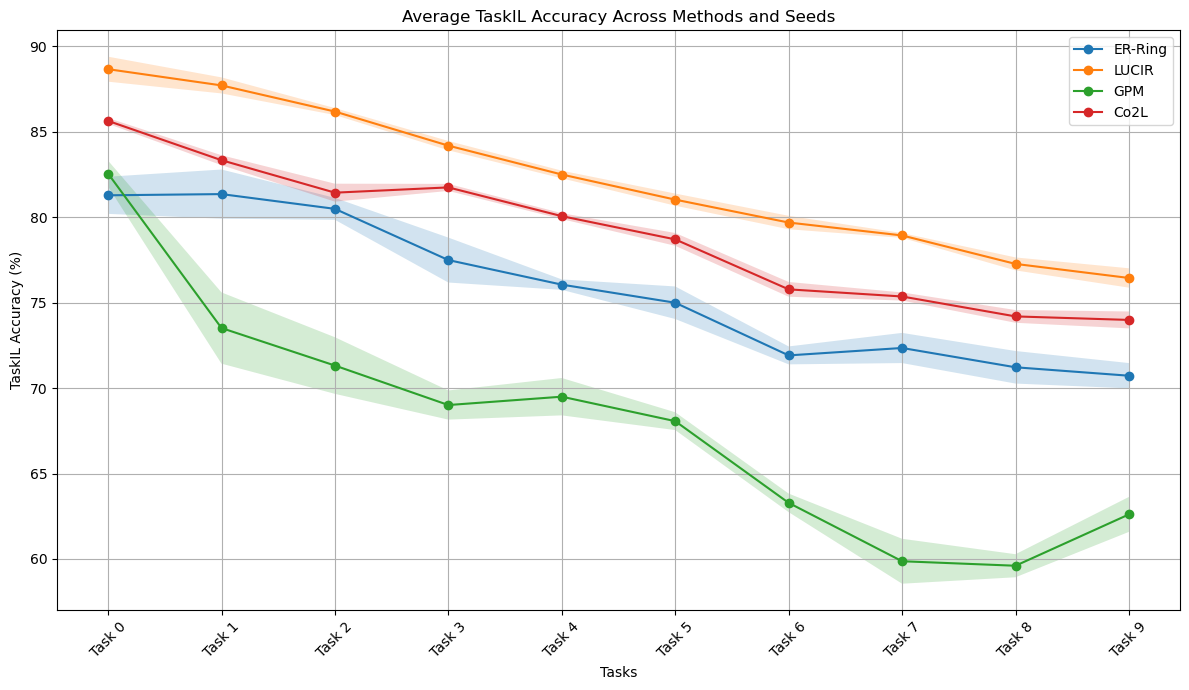

In [29]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir_lucir_herding2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l_co2l_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ]
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        taskil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*TaskIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, taskil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    taskil_acc = float(taskil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        taskil_accuracies.append([])

                    taskil_accuracies[-1].append(taskil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in taskil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average TaskIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('TaskIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
